In [5]:
# Install requirements here

#!pip install matplotlib

In [6]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

2026-01-22 02:50:33.192735: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-22 02:50:35.121419: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/usr/local/lib/python3.11/dist

# Model Training

The codes below trains a simple deep learning model to recognize hand-written digits.

In [7]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print("First 10 labels in y_train:", y_train[:10])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (60000, 28, 28), Labels shape: (60000,)
First 10 labels in y_train: [5 0 4 1 9 2 1 3 1 4]


In [8]:
# reshape the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype("float32") / 255.0


In [9]:
# define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
]) 

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.8776 - loss: 0.3975 - val_accuracy: 0.9801 - val_loss: 0.0629
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9649 - loss: 0.1196 - val_accuracy: 0.9863 - val_loss: 0.0433
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9769 - loss: 0.0801 - val_accuracy: 0.9867 - val_loss: 0.0369
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9825 - loss: 0.0631 - val_accuracy: 0.9893 - val_loss: 0.0306
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9838 - loss: 0.0547 - val_accuracy: 0.9919 - val_loss: 0.0230
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9862 - loss: 0.0463 - val_accuracy: 0.9919 - val_loss: 0.0244
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9883 - loss: 0.0417 - val_accuracy: 0.9906 - val_loss: 0.0279
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9888 - loss: 0.0373 - 

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9914 - loss: 0.0295
Test loss: 0.029462426900863647, Test accuracy: 0.9914000034332275


# Make Predictions

Now that we have trained a model, let's use this model to process a hand-written digit image and make inference.
Let's take a few images from `x_test`. 

Note that each image should be of shape `(28, 28, 1)`, and the values
should be normalized (divided by `255.0`).

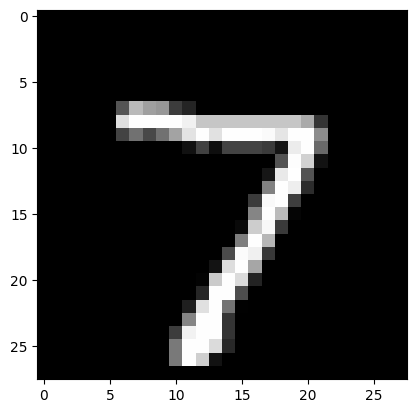

In [12]:
image1 = x_test[0].reshape(28, 28, 1) # Note the shape is (28, 28, 1) for a single image.
image2 = x_test[1].reshape(28, 28, 1) # Note the shape is (28, 28, 1) for a single image.

# Display the first image in the test set
plt.imshow(image1[:, :, 0], cmap='gray') # change "image1" to "image2" to display the second image



To make predictions, we need to make a list of multiple images (each image of shape `(28, 28, 1)`).

In [13]:
image_list = [image1, image2]

predicted_res = model.predict(np.array(image_list))
print(predicted_res)

# The predicted class for each image
predicted_classes = np.argmax(predicted_res, axis=1)
print("Predicted classes:", predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
[[5.1030818e-11 1.1866126e-07 1.5265051e-08 4.9132548e-10 2.9154888e-08
  4.0653492e-12 2.6554053e-14 9.9999988e-01 5.4810223e-12 2.4531162e-09]
 [6.5861374e-09 2.8533771e-09 1.0000000e+00 3.2211022e-11 2.9502116e-11
  1.1746753e-15 6.6485888e-09 4.4606489e-12 5.3750289e-09 1.5529754e-14]]
Predicted classes: [7 2]


## Remember!

what's important here is that the data sent for prediction is an array (or list) or one or multiple images, each of shape `(28, 28, 1)`.

Therefore, the shape of the input data is `(n, 28, 28, 1)` where `n` is the number of images.

# Save the model into a folder

The following cell saves the model into a folder, so that it can be loaded by `Tensorflow Serving` later.

In [14]:
# Save the model
# Here `1` is the version number of the model.
# You can change it to any number you like, but it should be unique for each version.
model_path = "models/digit_classifier/1"

# Delete the model directory if it exists
import os
if os.path.exists(model_path):
    import shutil
    shutil.rmtree(model_path)

# Export the model
model.export(
    model_path
)

INFO:tensorflow:Assets written to: models/digit_classifier/1/assets


INFO:tensorflow:Assets written to: models/digit_classifier/1/assets


Saved artifact at 'models/digit_classifier/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  130757450719376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130757450720144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130757450719760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130757450722256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130757450721488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130757450723216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130757450722640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130757450722832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130757450721872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  130757450723024: TensorSpec(shape=(), dtype=tf.resource, name=None)
